In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
OrangeDF = pd.read_csv("../OrangeQualityData.csv")

In [3]:
OrangeDF.head(5)

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


In [4]:
OrangeDF.dtypes

Size (cm)             float64
Weight (g)              int64
Brix (Sweetness)      float64
pH (Acidity)          float64
Softness (1-5)        float64
HarvestTime (days)      int64
Ripeness (1-5)        float64
Color                  object
Variety                object
Blemishes (Y/N)        object
Quality (1-5)         float64
dtype: object

In [5]:
print(OrangeDF["Color"].apply(type).unique())
print(OrangeDF["Variety"].apply(type).unique())
print(OrangeDF["Blemishes (Y/N)"].apply(type).unique())
print(OrangeDF.isna().sum())

[<class 'str'>]
[<class 'str'>]
[<class 'str'>]
Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64


^No columns with mixed values and no missing values in dataset

In [6]:
print(OrangeDF["Variety"].value_counts(normalize=True))
print(OrangeDF["Variety"].value_counts(normalize=True).head(10).sum())

Variety
Cara Cara                0.087137
Temple                   0.074689
Star Ruby                0.074689
Navel                    0.066390
Moro (Blood)             0.066390
Tangerine                0.058091
Clementine               0.058091
Washington Navel         0.058091
Satsuma Mandarin         0.053942
Ortanique (Hybrid)       0.053942
Minneola (Hybrid)        0.049793
Jaffa                    0.045643
Ambiance                 0.045643
Valencia                 0.045643
California Valencia      0.029046
Honey Tangerine          0.029046
Hamlin                   0.020747
Midsweet (Hybrid)        0.020747
Clementine (Seedless)    0.016598
Murcott (Hybrid)         0.012448
Navel (Late Season)      0.012448
Blood Orange             0.008299
Navel (Early Season)     0.008299
Tangelo (Hybrid)         0.004149
Name: proportion, dtype: float64
0.6514522821576764


^top 10 orange types make up 65% of the data, with the other 14 making up the other 35%

In [7]:
OrangeDF.describe()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,3.817427
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.014410
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,1.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,4.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,4.500000
max,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,5.000000


No extreme outliers and fairly normally distributed data for most columns as shown below

array([[<Axes: title={'center': 'Size (cm)'}>,
        <Axes: title={'center': 'Weight (g)'}>,
        <Axes: title={'center': 'Brix (Sweetness)'}>],
       [<Axes: title={'center': 'pH (Acidity)'}>,
        <Axes: title={'center': 'Softness (1-5)'}>,
        <Axes: title={'center': 'HarvestTime (days)'}>],
       [<Axes: title={'center': 'Ripeness (1-5)'}>,
        <Axes: title={'center': 'Quality (1-5)'}>, <Axes: >]],
      dtype=object)

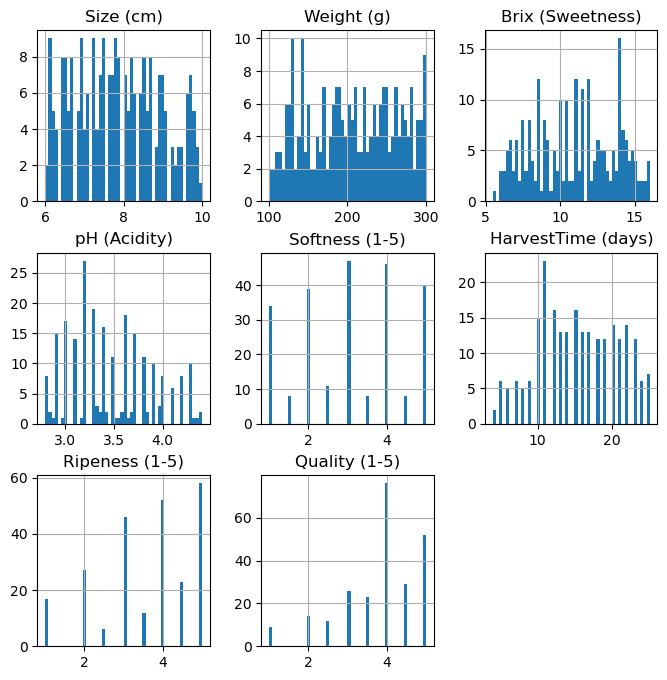

In [8]:
OrangeDF.hist(figsize=(8,8), bins=50)

In [9]:
OrangeDF["Blemishes (Y/N)"].value_counts(normalize=True)

Blemishes (Y/N)
N                          0.618257
Y (Sunburn Patch)          0.095436
Y (Scars)                  0.070539
Y (Minor)                  0.058091
Y (Mold Spot)              0.041494
Y (Bruising)               0.037344
Y (Split Skin)             0.033195
Y (Minor Insect Damage)    0.024896
Y (Sunburn)                0.008299
Y (Bruise)                 0.004149
N (Minor)                  0.004149
N (Split Skin)             0.004149
Name: proportion, dtype: float64

Since blemishes column is mixed strings, we need to convert to bool of yes/no if the orange is blemished

In [10]:
def binary_yes_no(series):
    series = series.copy()
    for i in range(len(series)):
        if 'Y' in series[i]:
            series[i] = 1
        else:
            series[i] = 0
    return series
OrangeDF["Blemishes (Y/N)"] = binary_yes_no(OrangeDF["Blemishes (Y/N)"])
OrangeDF= OrangeDF.drop(["Color"], axis="columns")
OrangeDF

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Valencia,0,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Navel,0,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Cara Cara,0,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Blood Orange,0,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Hamlin,1,4.5
...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Tangerine,1,5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Minneola (Hybrid),0,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Temple,1,5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Moro (Blood),1,3.0


<Axes: >

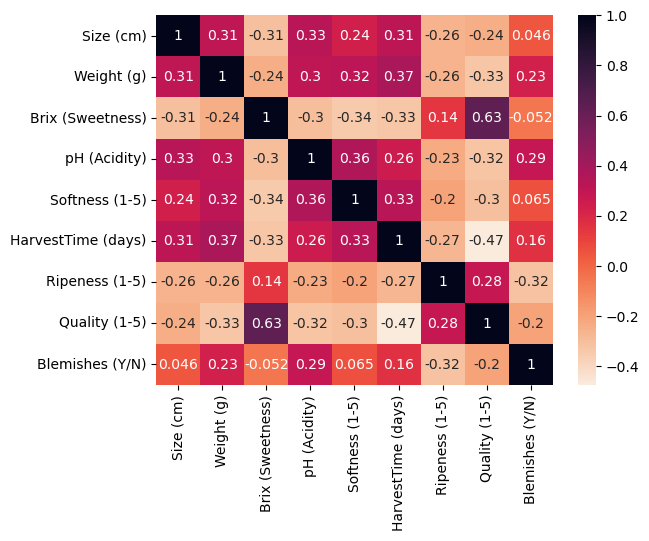

In [11]:
sns.heatmap(OrangeDF[['Size (cm)', 'Weight (g)', 'Brix (Sweetness)', 'pH (Acidity)', 'Softness (1-5)',
          'HarvestTime (days)', 'Ripeness (1-5)', 'Quality (1-5)', 'Blemishes (Y/N)']].corr(), cmap="rocket_r", annot=True)

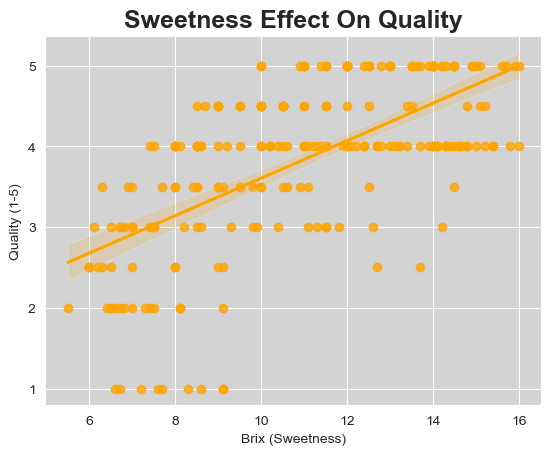

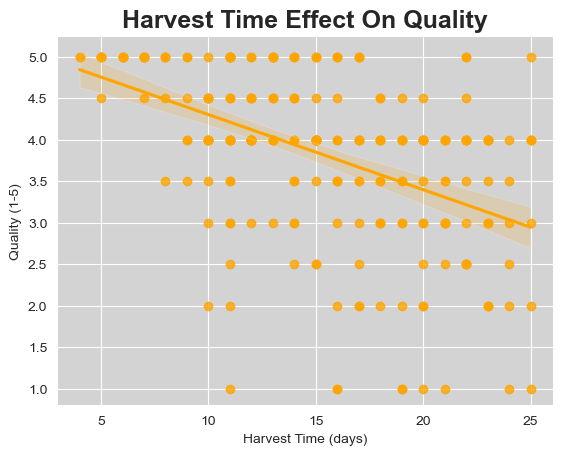

In [12]:
sns.set_style("darkgrid", rc={'axes.facecolor': 'lightgrey'})

fig, ax = plt.subplots()
sns.regplot(data=OrangeDF, x='Brix (Sweetness)', y='Quality (1-5)', color='orange', scatter=True)
ax.set_title("Sweetness Effect On Quality",size=18, weight='bold')
plt.show()

fig, ax = plt.subplots()
sns.regplot(data=OrangeDF, x='HarvestTime (days)', y='Quality (1-5)',color='orange')
ax.set_xlabel('Harvest Time (days)')
ax.set_title("Harvest Time Effect On Quality", size=18, weight='bold')
plt.show()

In [13]:
baseline = OrangeDF["Quality (1-5)"].mean()
mean_guesses = np.full(OrangeDF.shape[0], baseline)
print("mean baseline guess r^2:", r2_score(OrangeDF["Quality (1-5)"], mean_guesses))
print("mean baseline guess MAE:", mean_absolute_error(OrangeDF["Quality (1-5)"], mean_guesses))
print("mean baseline guess MSE:", mean_squared_error(OrangeDF["Quality (1-5)"], mean_guesses))

mean baseline guess r^2: 0.0
mean baseline guess MAE: 0.7897419121571596
mean baseline guess MSE: 1.0247585268848678


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor

In [15]:
X = OrangeDF.drop(columns=['Quality (1-5)', 'Variety'])
y = OrangeDF['Quality (1-5)']

lin_reg = LinearRegression()
lin_scores = cross_validate(estimator=lin_reg, X=X, y=y, scoring = ('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'))
mlp_model = MLPRegressor(hidden_layer_sizes= 1000, activation="relu", early_stopping=True, max_iter=500)
mlp_scores = cross_validate(estimator=mlp_model, X=X, y=y, scoring = ('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'))
tree_model = DecisionTreeRegressor()
tree_scores = cross_validate(estimator=tree_model, X=X, y=y, scoring = ('r2', 'neg_mean_absolute_error', 'neg_mean_squared_error'))
print("LINEAR REGRESSION:")
print("r^2s:", lin_scores["test_r2"], "\nMAE:", -lin_scores["test_neg_mean_absolute_error"], "\nMSE", -lin_scores['test_neg_mean_squared_error'])
print("\nMULTILAYER PERCEPTRON:")
print("r^2s:", mlp_scores["test_r2"], "\nMAE:", -mlp_scores["test_neg_mean_absolute_error"], "\nMSE", -mlp_scores['test_neg_mean_squared_error'])
print("\nDECISION TREE:")
print("r^2s:", tree_scores["test_r2"], "\nMAE:", -tree_scores["test_neg_mean_absolute_error"], "\nMSE", -tree_scores['test_neg_mean_squared_error'])





LINEAR REGRESSION:
r^2s: [0.39824754 0.42717193 0.23199958 0.23614747 0.22132411] 
MAE: [0.63176573 0.53574796 0.72742815 0.54049215 0.69251087] 
MSE [0.63496037 0.39375714 0.80391711 0.56286052 0.8922328 ]

MULTILAYER PERCEPTRON:
r^2s: [0.3950977  0.39415192 0.31429317 0.05016218 0.33410057] 
MAE: [0.64016155 0.55822475 0.69835993 0.64626905 0.6906529 ] 
MSE [0.63828404 0.41645481 0.71777493 0.69990762 0.76300977]

DECISION TREE:
r^2s: [ 0.54549043  0.74238358 -0.09961646 -0.43484023 -0.04545455] 
MAE: [0.32653061 0.20833333 0.82291667 0.63541667 0.72916667] 
MSE [0.47959184 0.17708333 1.15104167 1.05729167 1.19791667]


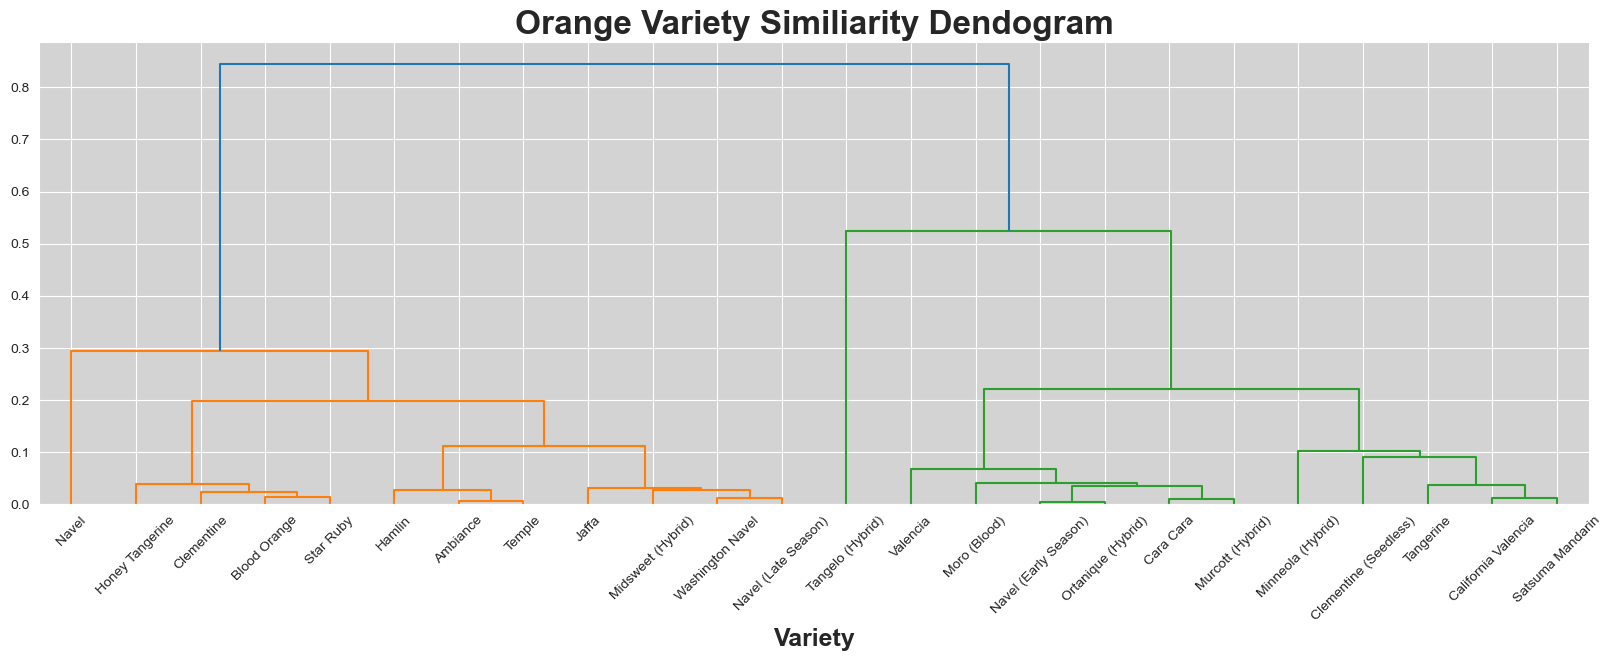

In [16]:
# This is for our hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from sklearn.preprocessing import normalize

# Load the data, save off the state names into another series and just leave the attributess
x1 = OrangeDF[['Brix (Sweetness)', 'HarvestTime (days)', 'pH (Acidity)','Variety']]
x1 = x1.groupby(by='Variety').mean()[['Brix (Sweetness)', 'HarvestTime (days)', 'pH (Acidity)']]
x1 = normalize(x1)
x1.shape # (24,3)
varieties = OrangeDF['Variety'].unique() # Labels
pdist_matrix = pdist(x1, metric='euclidean')

# Plot the dendrogram for the Ward proximity measure
ward_dendogram=linkage(pdist_matrix, method='ward', metric='euclidean', optimal_ordering=False) # Create the clustering model
fig = plt.figure(figsize=(20, 6))
dn = dendrogram(ward_dendogram, labels=np.array(varieties)) # Create the dendogram based off of the model
plt.xlabel("Variety", size=18, weight='bold')
plt.title("Orange Variety Similiarity Dendogram", size=24, weight='bold')
plt.show()

In [17]:
from sklearn.cluster import KMeans

In [18]:
n_clusters = 2
KM = KMeans(n_clusters = n_clusters)
to_cluster = X[["Brix (Sweetness)", "HarvestTime (days)"]]
KM.fit(to_cluster)
labels = KM.labels_
cluster_df = pd.DataFrame({"quality score": y.to_list(), "cluster label": labels})
cluster_df.sort_values(by="cluster label")
for i in range(n_clusters):
    print("cluster", i, "median quality score:", cluster_df.loc[cluster_df["cluster label"] == i]["quality score"].median())


cluster 0 median quality score: 3.5
cluster 1 median quality score: 4.5


/Users/michael.781/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
